In [ ]:
# Linux Package Installation
!apt-get -qq -y install fonts-nanum > /dev/null

# Delete Cache
!rm -rf ~/.cache/matplotlib -rf

In [ ]:
import os

os.kill(os.getpid(), 9)

In [1]:
from collections import Counter
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

Mounted at /content/drive


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [3]:
DF = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF['product'] = DF['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF= DF[['consumer complaint narrative','product']]

In [ ]:
DF_old = pd.read_csv('/content/drive/MyDrive/DF_old.csv')
DF_old

,consumer complaint narrative,product
0,Dear Amex Subject : Urgent Follow-Up - Dispute...,Credit card
1,Being a 22+ Amazon Prime member I opted to tak...,Credit card
2,this all started in XX/XX/2022 I had been maki...,Credit card
3,XX/XX/XXXX Note : Synchrony will not return ou...,Credit card
4,On XX/XX/XXXX I attempted to pay my Chase Cred...,Credit card
...,...,...
53829,Hi.\n\nAt end of XX/XX/XXXX Bank of America s...,Checking or savings account
53830,"In XXXX, the XXXX XXXX XXXX banked with XXXX B...",Checking or savings account
53831,Below is a list of charges that was withdraw f...,Checking or savings account
53832,"I was a Victim of Fraud my Account, Husband an...",Checking or savings account


In [ ]:
DF_old.to_csv('DF_old.csv', index = False)

# 토큰화

In [4]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
data = list(DF['consumer complaint narrative'])
clean = []
for narrative in (data):
 clean_narrative = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》XXXX{}]', '', narrative)
 clean.append(clean_narrative)
DF['narrative'] = clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
lower = [text.lower() for text in DF['narrative'].values]
DF['narrative'] = lower

In [6]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

DF["narrative"]=DF["narrative"].apply(lambda x: remove_stopwords(x))

DF.head()

,consumer complaint narrative,product,narrative
0,I made a purchase with XXXX to purchase a prod...,Credit card,made purchase purchase product bestbuy charge ...
1,i asked the JC Penny store employee if there w...,Credit card,asked jc penny store employee instore coupons ...
2,"Synchrony Bank, who owns the stores credit car...",Credit card,synchrony bank owns stores credit cards rooms ...
3,This bank doesnt value me as a customer or my ...,Credit card,bank doesnt value customer business never appr...
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,purchase hacked debit card canceled card next ...


In [ ]:
from collections import Counter

# 모든 단어를 하나의 리스트로 펼침
words = [word for sentence in DF_old['tokenized_nar'] for word in sentence]

# 각 단어의 빈도를 계산
word_counts = Counter(words)

print(word_counts)

In [ ]:
sentences = []
for review in list(DF_old['narrative']):
    sentences.append(review.split())
sentences

In [ ]:
DF_old['tokenized_nar']

0        [dear, amex, subject, urgent, followup, disput...
1        [22, amazon, prime, member, opted, take, amazo...
2        [started, 2022, making, monthly, payment, auto...
3        [note, synchrony, return, call, way, get, comm...
4        [attempted, pay, chase, credit, card, person, ...
                               ...                        
53829    [hi, end, bank, america, sent, letter, stated,...
53830    [banked, bank, received, letter, bank, said, f...
53831    [list, charge, withdraw, checking, account, wi...
53832    [victim, fraud, account, husband, son, 1300000...
53833    [past, summer, 2022, credit, karma, advertised...
Name: tokenized_nar, Length: 53834, dtype: object

# 인코딩

## 1.레이블인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder
DF_old['product_L'] = LabelEncoder().fit_transform(DF_old['product'])

In [ ]:
DF_old['product_L'].value_counts()

product_L
2    14586
1    10576
5     9541
3     7232
0     7228
4     1927
8     1257
7      778
6      709
Name: count, dtype: int64

In [ ]:
DF_old['product'].value_counts()

product
Credit reporting               14586
Credit card                    10576
Mortgage                        9541
Debt collection                 7232
Checking or savings account     7228
Money transfer                  1927
Vehicle loan or lease           1257
Student loan                     778
Payday loan                      709
Name: count, dtype: int64

## 2.원-핫 인코딩

In [7]:
A = pd.get_dummies(DF['product']).astype('int')
DF = pd.concat([DF, A], axis = 1)
DF.head()

,consumer complaint narrative,product,narrative,Checking or savings account,Credit card,Credit reporting,Debt collection,Money transfer,Mortgage,Payday loan,Student loan,Vehicle loan or lease
0,I made a purchase with XXXX to purchase a prod...,Credit card,made purchase purchase product bestbuy charge ...,0,1,0,0,0,0,0,0,0
1,i asked the JC Penny store employee if there w...,Credit card,asked jc penny store employee instore coupons ...,0,1,0,0,0,0,0,0,0
2,"Synchrony Bank, who owns the stores credit car...",Credit card,synchrony bank owns stores credit cards rooms ...,0,1,0,0,0,0,0,0,0
3,This bank doesnt value me as a customer or my ...,Credit card,bank doesnt value customer business never appr...,0,1,0,0,0,0,0,0,0
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,purchase hacked debit card canceled card next ...,0,1,0,0,0,0,0,0,0


In [ ]:
DF.to_csv('deep.csv', index = False)

# 패딩

pad_sequences( )

padding = 'pre': 문장 길이 2500으로 변경 후 앞쪽에 '0' 채우기

padding = 'post': 문장 길이 2500으로 변경 후 뒤쪽에 '0' 채우기

maxlen: 최대 길이 지정 (미지정 시 가장 긴 문장 길이)

truncating: maxlen보다 긴 문장 값 제거 ('pre' or 'post')

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(DF['narrative'])

In [ ]:
A = tokenizer.word_index
len(A)

61849

In [9]:
sequences = tokenizer.texts_to_sequences(DF['narrative'])
len(sequences)

1326541

In [ ]:
print('리뷰 최대 길이 :', max(len(L) for L in sequences))
print('리뷰 평균 길이 :', sum(map(len, sequences))/len(sequences))

In [ ]:
print(sequences[0])
print
print(DF_old['narrative'][0])

[1059, 1688, 874, 2998, 2111, 73, 217, 59, 23731, 187, 2228, 22, 216, 745, 1059, 503, 594, 19, 433, 674, 73, 217, 59, 23731, 187, 80, 1665, 22, 216, 373, 2080, 99, 14, 1027, 2615, 11, 294, 8, 8, 61, 4096, 257, 92, 62, 13433, 501, 28, 660, 1110, 73, 950, 144, 86, 30, 8, 69, 22, 165, 102, 64, 34, 122, 274, 41, 2624, 285, 22, 506, 2200, 572, 19, 1066, 6192, 357, 1481, 22, 772, 301, 380, 368, 4303, 587, 290, 457, 15, 445, 357, 690, 818, 2700, 237, 1343, 1263, 217, 59, 1317, 12, 72, 52, 208, 142, 783, 303, 190, 578, 60, 1017, 15, 1109, 4134, 170, 1360, 111, 14, 32, 279, 553, 325, 45, 170, 2081, 9869, 2945, 507, 180, 79, 287, 465, 491, 2657, 11, 8, 122, 457, 1762, 73, 5043, 1003, 340, 92, 1360, 111, 2442, 122, 5044, 2701, 2120, 507, 622, 32, 27, 302, 446, 1438, 912, 235, 719, 10358, 794, 273, 572, 275, 132, 976, 6985, 229, 14, 413, 1718, 119]
dear amex subject urgent followup dispute regarding charges unperformed services ref letter dated fax dear american express company writing follow disp

In [ ]:
max_len = max(len(s) for s in sequences)

max_len

2915

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences = pad_sequences(sequences,
                        maxlen = 150,
                        padding = 'post',
                        truncating = 'post')

# 벡터화

## 1)TFIDF

In [ ]:
X = DF_old['narrative']
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
X_tfidf.shape

(53834, 61860)

## 2)BOW

In [ ]:
X = DF_old['narrative']
from sklearn.feature_extraction.text import CountVectorizer
Count_vectorizer = CountVectorizer()
X_Count = Count_vectorizer.fit_transform(X)
X_Count = X_Count.astype(np.float64)
X_Count.dtype

dtype('float64')

In [ ]:
X_Count.shape

(53834, 61855)

## 3) Word2Vec

In [ ]:
model = Word2Vec(sentences, vector_size=512, window=7, min_count=1000)
word_vectors = model.wv

In [ ]:
plt.figure(figsize=(25, 25))
for i, word in enumerate(word_vectors.index_to_key):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
###
plt.xlabel("t-SNE Axis 1")
plt.ylabel("t-SNE Axis 2")
plt.title("Word Similarity Visualization")
plt.show()

In [ ]:
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features),dtype=np.float32)

    num_words = 0
    index2word_set = set(model.wv.index_to_key)

    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[w])

    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [ ]:
def get_dataset(reviews, model, num_features):
    dataset = list()

    for s in reviews:
        dataset.append(get_features(s, model, num_features))

    reviewFeatureVecs = np.stack(dataset)

    return reviewFeatureVecs

# 실행
test_data_vecs = get_dataset(sentences, model, 512)

In [ ]:
test_data_vecs.shape

(53834, 512)

# 데이터 Split

In [11]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [12]:
y =DF[['Checking or savings account', 'Credit card', 'Credit reporting',
       'Debt collection', 'Money transfer', 'Mortgage', 'Payday loan',
       'Student loan', 'Vehicle loan or lease']].values

In [13]:
y = y.astype(np.float32)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
#x = X_tfidf
#x = X_Count
#x = test_data_vecs
x = sequences
#Y = DF_old['product_L']
Y = y
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size = 0.2, stratify = Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1061232, 150) (1061232, 9) (265309, 150) (265309, 9)


In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y_train,
                                                      test_size = 0.2,
                                                      stratify = y_train,
                                                      random_state = 2045)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(848985, 150) (212247, 150) (848985, 9) (212247, 9)


# 모델링

## 1.DNN

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(2048, activation = 'relu', input_shape = (512,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(9, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2048)              1050624   
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 2166537 (8.26 MB)
Trainable params: 2166537 (8.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))
## BOW한 데이터로는 평균 0.82xx의 성능

In [ ]:
model = Sequential()
model.add(Embedding(10000, 120))
model.add(LSTM(120))
model.add(Dense(9, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 120)         1200000   
                                                                 
 lstm (LSTM)                 (None, 120)               115680    
                                                                 
 dense_4 (Dense)             (None, 9)                 1089      
                                                                 
Total params: 1316769 (5.02 MB)
Trainable params: 1316769 (5.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
## early stopping하는법
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 학습을 조기 종료(Early Stopping)
mc = ModelCheckpoint('model_A', monitor='val_accurracy', mode='max', verbose=1, save_best_only=True)
# ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
# 모델 학습
# val_loss가 줄어들다가 증가하는 상황이 오면 과적합(overfitting)으로 판단하기 위해
# validation_data로 X_test와 y_test를 사용 , callbacks=[es, mc]
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))


## 2.CNN

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential(name = 'Conv1D')
model.add(layers.Embedding(input_dim = 10000,
                          output_dim = 32,
                          input_length = 61855))
model.add(layers.Conv1D(16, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Flatten())
model.add(layers.Dense(9, activation = 'softmax'))

In [ ]:
model.summary()

Model: "Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 61855, 32)         320000    
                                                                 
 conv1d_23 (Conv1D)          (None, 61851, 16)         2576      
                                                                 
 max_pooling1d_23 (MaxPooli  (None, 20617, 16)         0         
 ng1D)                                                           
                                                                 
 conv1d_24 (Conv1D)          (None, 20613, 32)         2592      
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 6871, 32)          0         
 ng1D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 219872)            0    

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
%%time

Hist_KKK = model.fit(x_train, y_train,
                       epochs = 30,
                       batch_size = 64,
                       validation_data = (x_test, y_test))

Epoch 1/30
673/673 [==============================] - 444s 653ms/step - loss: 0.7108 - accuracy: 0.7724 - val_loss: 0.5621 - val_accuracy: 0.8260
Epoch 2/30
673/673 [==============================] - 436s 648ms/step - loss: 0.4155 - accuracy: 0.8699 - val_loss: 0.5768 - val_accuracy: 0.8240
Epoch 3/30
673/673 [==============================] - 436s 648ms/step - loss: 0.3168 - accuracy: 0.8997 - val_loss: 0.6433 - val_accuracy: 0.8196
Epoch 4/30
673/673 [==============================] - 437s 648ms/step - loss: 0.2339 - accuracy: 0.9288 - val_loss: 0.7366 - val_accuracy: 0.8131
Epoch 5/30
673/673 [==============================] - 434s 645ms/step - loss: 0.1700 - accuracy: 0.9486 - val_loss: 0.8043 - val_accuracy: 0.8169
Epoch 6/30
673/673 [==============================] - 436s 647ms/step - loss: 0.1261 - accuracy: 0.9631 - val_loss: 1.0352 - val_accuracy: 0.8023
Epoch 7/30
673/673 [==============================] - 434s 645ms/step - loss: 0.0915 - accuracy: 0.9713 - val_loss: 1.2797 -

## 3.CNN, LSTM

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = models.Sequential(name = 'Conv1D')
model.add(layers.Embedding(input_dim = 10000,
                          output_dim = 128,
                          input_length = 150))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.LSTM(64))
model.add(layers.Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation = 'softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
%%time

Hist_KKK = model.fit(X_train, y_train,
                       epochs = 20,
                       batch_size = 512,
                       validation_data = (X_valid, y_valid))

Epoch 1/20
1659/1659 [==============================] - 80s 43ms/step - loss: 0.7967 - accuracy: 0.7758 - val_loss: 0.5062 - val_accuracy: 0.8561
Epoch 2/20
1659/1659 [==============================] - 35s 21ms/step - loss: 0.4938 - accuracy: 0.8667 - val_loss: 0.4475 - val_accuracy: 0.8727
Epoch 3/20
1659/1659 [==============================] - 31s 19ms/step - loss: 0.4406 - accuracy: 0.8811 - val_loss: 0.4279 - val_accuracy: 0.8756
Epoch 4/20
1659/1659 [==============================] - 29s 18ms/step - loss: 0.4039 - accuracy: 0.8942 - val_loss: 0.4333 - val_accuracy: 0.8846
Epoch 5/20
1659/1659 [==============================] - 29s 17ms/step - loss: 0.3759 - accuracy: 0.9039 - val_loss: 0.4209 - val_accuracy: 0.8860
Epoch 6/20
1659/1659 [==============================] - 29s 17ms/step - loss: 0.3512 - accuracy: 0.9110 - val_loss: 0.4358 - val_accuracy: 0.8866
Epoch 7/20
1659/1659 [==============================] - 29s 18ms/step - loss: 0.3306 - accuracy: 0.9171 - val_loss: 0.4208 -

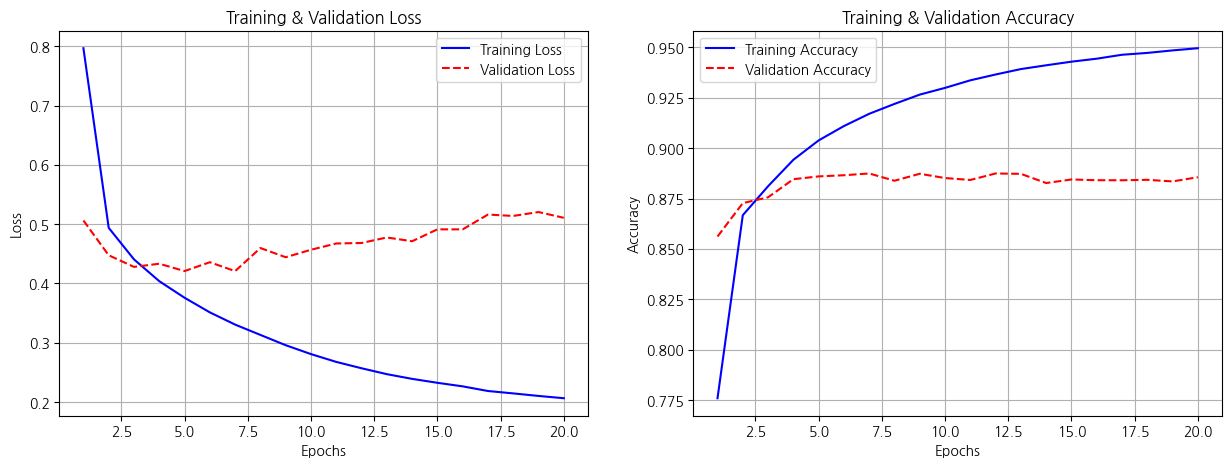

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_KKK.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_KKK.history['loss'], 'b-')
plt.plot(epochs, Hist_KKK.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_KKK.history['accuracy'], 'b-')
plt.plot(epochs, Hist_KKK.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# 모델 선택

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = models.Sequential(name = 'Conv1D')
model.add(layers.Embedding(input_dim = 10000,
                          output_dim = 128,
                          input_length = 150))
model.add(layers.Conv1D(32, 5, activation = 'relu', kernel_regularizer = regularizers.l2(0.0005)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 5, activation = 'relu', kernel_regularizer = regularizers.l2(0.0005)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(64, kernel_regularizer = regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
%%time

Hist_KKK = model.fit(X_train, y_train,
                       epochs = 30,
                       batch_size = 512,
                       validation_data = (X_valid,y_valid))

Epoch 1/30
1659/1659 [==============================] - 79s 43ms/step - loss: 0.6153 - accuracy: 0.8130 - val_loss: 0.4045 - val_accuracy: 0.8763
Epoch 2/30
1659/1659 [==============================] - 33s 20ms/step - loss: 0.4133 - accuracy: 0.8756 - val_loss: 0.3668 - val_accuracy: 0.8865
Epoch 3/30
1659/1659 [==============================] - 30s 18ms/step - loss: 0.3868 - accuracy: 0.8828 - val_loss: 0.3580 - val_accuracy: 0.8881
Epoch 4/30
1659/1659 [==============================] - 30s 18ms/step - loss: 0.3718 - accuracy: 0.8869 - val_loss: 0.3541 - val_accuracy: 0.8903
Epoch 5/30
1659/1659 [==============================] - 29s 18ms/step - loss: 0.3613 - accuracy: 0.8904 - val_loss: 0.3443 - val_accuracy: 0.8923
Epoch 6/30
1659/1659 [==============================] - 28s 17ms/step - loss: 0.3528 - accuracy: 0.8931 - val_loss: 0.3440 - val_accuracy: 0.8919
Epoch 7/30
1659/1659 [==============================] - 28s 17ms/step - loss: 0.3465 - accuracy: 0.8950 - val_loss: 0.3415 -

# 여기

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = models.Sequential(name = 'Conv1D')
model.add(layers.Embedding(input_dim = 10000,
                          output_dim = 128,
                          input_length = 150))
model.add(layers.Conv1D(32, 5, activation = 'relu', kernel_regularizer = regularizers.l2(0.0005)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 5, activation = 'relu', kernel_regularizer = regularizers.l2(0.0005)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(64, kernel_regularizer = regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation = 'softmax'))

In [18]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [22]:
Hist_KKK = model.fit(X_train, y_train,
                      epochs = 20,
                     callbacks=[mc],
                      batch_size = 512,
                     validation_data = (X_valid,y_valid))

Epoch 1/20
1659/1659 [==============================] - ETA: 0s - loss: 0.3348 - accuracy: 0.8989
Epoch 1: val_accuracy improved from -inf to 0.89315, saving model to model_A
1659/1659 [==============================] - 33s 19ms/step - loss: 0.3348 - accuracy: 0.8989 - val_loss: 0.3419 - val_accuracy: 0.8932
Epoch 2/20
1659/1659 [==============================] - ETA: 0s - loss: 0.3298 - accuracy: 0.9003
Epoch 2: val_accuracy improved from 0.89315 to 0.89633, saving model to model_A
1659/1659 [==============================] - 31s 19ms/step - loss: 0.3298 - accuracy: 0.9003 - val_loss: 0.3355 - val_accuracy: 0.8963
Epoch 3/20
1659/1659 [==============================] - ETA: 0s - loss: 0.3248 - accuracy: 0.9019
Epoch 3: val_accuracy did not improve from 0.89633
1659/1659 [==============================] - 27s 16ms/step - loss: 0.3248 - accuracy: 0.9019 - val_loss: 0.3438 - val_accuracy: 0.8958
Epoch 4/20
1659/1659 [==============================] - ETA: 0s - loss: 0.3217 - accuracy: 0.

In [26]:
model = load_model('/content/drive/MyDrive/model_A')

In [28]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

8291/8291 [==============================] - 35s 4ms/step - loss: 0.3472 - accuracy: 0.8989

 테스트 정확도: 0.8989


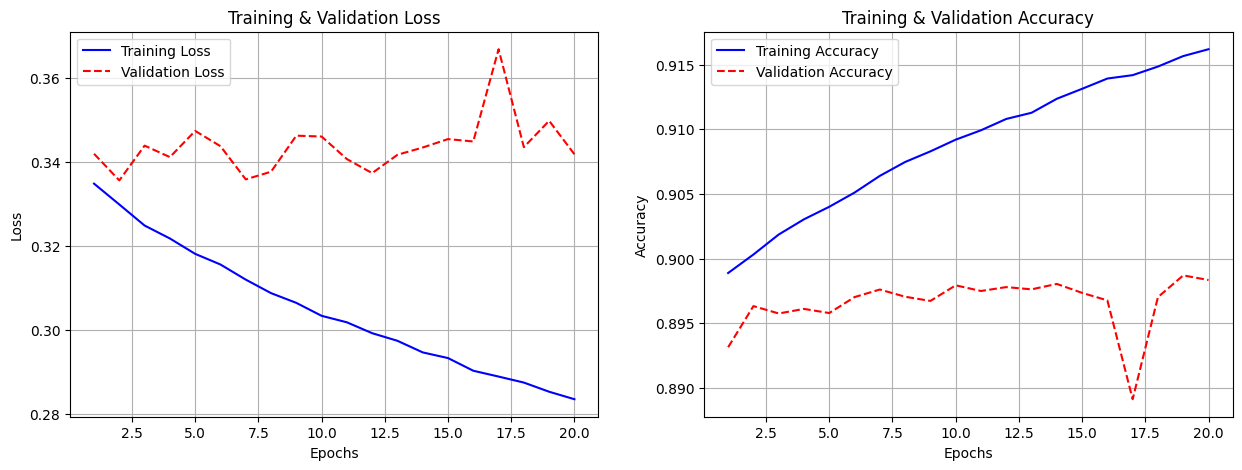

In [25]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_KKK.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_KKK.history['loss'], 'b-')
plt.plot(epochs, Hist_KKK.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_KKK.history['accuracy'], 'b-')
plt.plot(epochs, Hist_KKK.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# 제일 좋은 성능

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = models.Sequential(name = 'Conv1D')
model.add(layers.Embedding(input_dim = 10000,
                          output_dim = 128,
                          input_length = 150))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.LSTM(64))
model.add(layers.Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation = 'softmax'))

In [21]:
## early stopping하는법
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 학습을 조기 종료(Early Stopping)
mc = ModelCheckpoint('model_A', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
%%time

Hist_KKK = model.fit(X_train, y_train,
                       callbacks=[es, mc],
                       epochs = 20,
                       batch_size = 512,
                       validation_data = (X_valid,y_valid))

Epoch 1/20
1659/1659 [==============================] - ETA: 0s - loss: 0.6100 - accuracy: 0.8180
Epoch 1: val_accuracy improved from -inf to 0.87793, saving model to best_model.h5
1659/1659 [==============================] - 105s 56ms/step - loss: 0.6100 - accuracy: 0.8180 - val_loss: 0.4036 - val_accuracy: 0.8779
Epoch 2/20
1659/1659 [==============================] - ETA: 0s - loss: 0.3901 - accuracy: 0.8870
Epoch 2: val_accuracy improved from 0.87793 to 0.89084, saving model to best_model.h5
1659/1659 [==============================] - 34s 20ms/step - loss: 0.3901 - accuracy: 0.8870 - val_loss: 0.3606 - val_accuracy: 0.8908
Epoch 3/20
1659/1659 [==============================] - ETA: 0s - loss: 0.3443 - accuracy: 0.9013
Epoch 3: val_accuracy improved from 0.89084 to 0.89376, saving model to best_model.h5
1659/1659 [==============================] - 39s 23ms/step - loss: 0.3443 - accuracy: 0.9013 - val_loss: 0.3535 - val_accuracy: 0.8938
Epoch 4/20
1659/1659 [=======================

In [ ]:
model = load_model('best_model.h5')

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

8291/8291 [==============================] - 44s 5ms/step - loss: 0.3720 - accuracy: 0.8990

 테스트 정확도: 0.8990


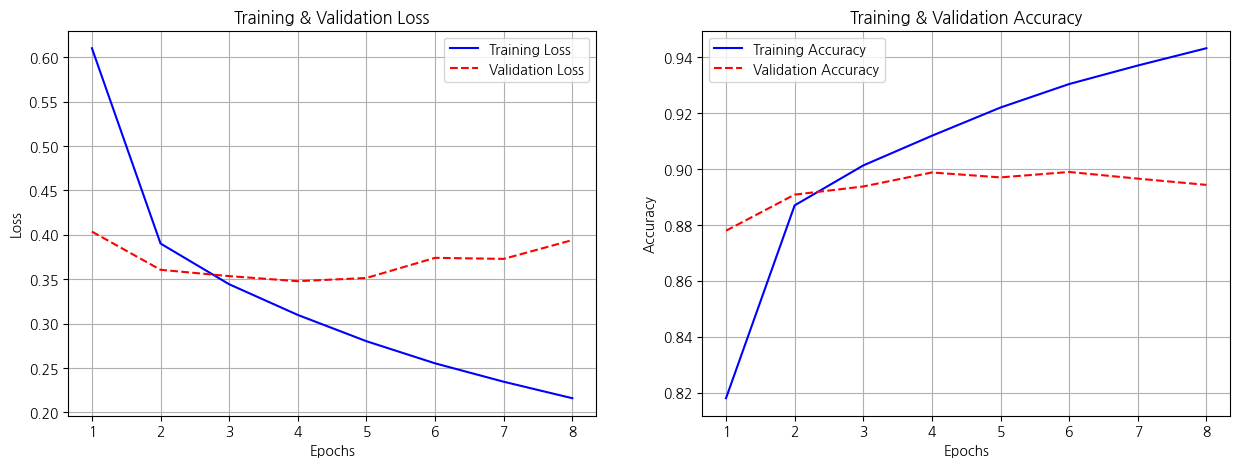

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_KKK.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_KKK.history['loss'], 'b-')
plt.plot(epochs, Hist_KKK.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_KKK.history['accuracy'], 'b-')
plt.plot(epochs, Hist_KKK.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()